In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Input, Flatten
from keras.datasets import mnist

In [24]:
mnist = mnist.load_data()

In [35]:
(x_train, y_train), (x_test, y_test) = mnist

In [36]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1],
                          x_train.shape[2], 
                          1).astype("float32")
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1],
                        x_test.shape[2], 
                        1).astype("float32")
x_train /= x_train.max()
x_test /= x_test.max()

In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
input1 = Input((28, 28, 1))
conv1 = Conv2D(16, (3, 3), activation="relu", padding="same", strides=2)(input1)
#pool1 = MaxPool2D(pool_size=2)(conv1)
conv2 = Conv2D(32, (3, 3), activation="relu", padding="same", strides=2)(conv1)
#pool2 = MaxPool2D(pool_size=2)(conv2)
flat = Flatten()(conv2)
output = Dense(10, activation='softmax')(flat)

In [39]:
model = Model(input1, output)

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile("Adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.4868 - acc: 0.8690 - val_loss: 0.2356 - val_acc: 0.9338
Epoch 2/10
48000/48000 [==============================] - 5s 100us/step - loss: 0.2007 - acc: 0.9415 - val_loss: 0.1463 - val_acc: 0.9602
Epoch 3/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.1280 - acc: 0.9624 - val_loss: 0.1083 - val_acc: 0.9691
Epoch 4/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0959 - acc: 0.9718 - val_loss: 0.1035 - val_acc: 0.9714
Epoch 5/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0799 - acc: 0.9759 - val_loss: 0.0827 - val_acc: 0.9758
Epoch 6/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.0690 - acc: 0.9790 - val_loss: 0.0766 - val_acc: 0.9773
Epoch 7/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0598 - acc: 0.9816 - val_loss: 0.0785 - val_a

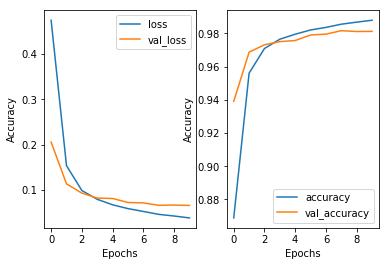

In [12]:
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(['loss', 'val_loss'])
plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [13]:
test_lables_p = model.predict(x_test)
test_lables_p

array([[1.03736854e-12, 2.96321843e-12, 2.06458264e-08, ...,
        9.99954224e-01, 7.15784125e-08, 1.29935657e-07],
       [4.38446640e-11, 3.16369415e-06, 9.99996066e-01, ...,
        3.13114332e-16, 1.29684363e-09, 1.05806036e-13],
       [6.00887324e-06, 9.98536706e-01, 8.99080624e-05, ...,
        5.61733323e-04, 6.31454983e-04, 5.61213392e-06],
       ...,
       [1.45452953e-12, 2.54088217e-09, 3.61298166e-12, ...,
        3.13316173e-06, 2.17637808e-06, 4.28547446e-06],
       [3.41993849e-13, 3.75656300e-14, 4.33798268e-14, ...,
        2.92662700e-11, 5.34756009e-06, 8.96355268e-10],
       [9.79373613e-12, 2.40998301e-15, 2.58462247e-08, ...,
        1.64368427e-15, 7.73202447e-10, 8.90494479e-14]], dtype=float32)

In [26]:
df = pd.DataFrame(np.argmax(test_lables_p, axis=1))

In [31]:
df['y']= np.argmax(y_test, axis=1)

In [41]:
(df[0] - df['y'])[((df[0] - df['y']) != 0)]

115     5
247    -2
321     5
409     7
421    -2
       ..
9811    6
9839    1
9904    6
9905    6
9982    1
Length: 171, dtype: int64